## Simulaciones de eventos aleatorios ##

## 1. Simulación de un dado ##

Es posible simular números aleatorios con una computadora

In [1]:
import random
random.random()

0.11769055111274995

Esto permite simular experimentos de naturaleza aleatoria.  Los valores posibles de un dado son:

In [2]:
dado = [1, 2, 3, 4, 5, 6]

Tirar el dado:

In [3]:
import numpy as np

Tirar el dado una vez:

In [9]:
y = np.random.choice(dado)
print y

5


Tirar el dado 100 veces:

In [13]:
y = np.random.choice(dado, 100, replace=True)
y

array([5, 6, 5, 1, 3, 2, 5, 6, 1, 1, 4, 1, 4, 1, 6, 5, 5, 1, 2, 5, 3, 3,
       5, 2, 3, 6, 6, 2, 5, 6, 6, 4, 3, 2, 5, 3, 4, 4, 3, 3, 3, 2, 5, 4,
       3, 1, 6, 5, 5, 3, 6, 3, 3, 6, 3, 3, 2, 5, 2, 4, 4, 4, 4, 3, 3, 2,
       3, 1, 3, 1, 6, 2, 5, 3, 3, 3, 1, 1, 6, 2, 4, 1, 6, 6, 5, 4, 5, 1,
       1, 3, 6, 5, 5, 4, 2, 3, 5, 3, 6, 1])

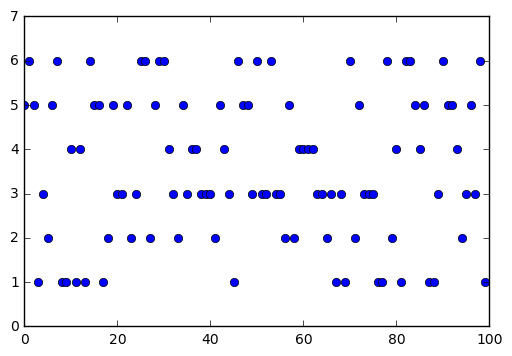

In [14]:
import matplotlib.pyplot as plt
plt.plot(y, 'bo')
plt.axis([0, 100, 0, 7])
plt.show()

contar la fraccion de veces que sale, por ejemplo, el 3:

In [15]:
z = []
k = 3
cont = 0

for i in range(10000):
    y = np.random.choice(dado, 1)
    if y[0] == k: cont+=1
    z.append(float(cont)/float(i+1))    

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
1./6.

0.16666666666666666

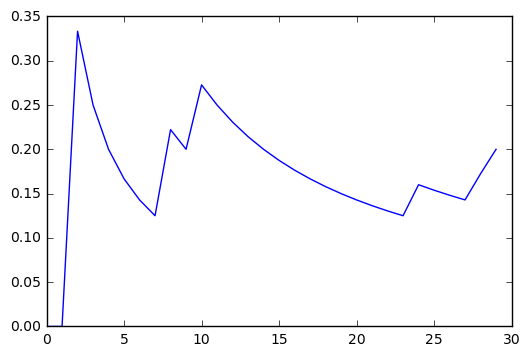

In [18]:
plt.plot(z[0:30])
plt.show()

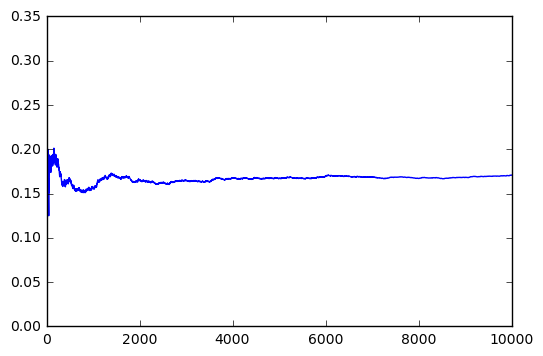

In [19]:
plt.plot(z)
plt.show()

## 2. Pensando números ##

Calculemos los valores medios de submuestras elegidas al azar de un conjunto cualquier de números

In [20]:
x = [5,8,10,14,25,43,7,0,3,2,22,33,41,1,11,7]
Ns = 5

In [21]:
import numpy as np
y = np.random.choice(x, Ns)
y.sum()/float(Ns)

26.0

In [22]:
p = []
for i in range(100000):
    y = np.random.choice(x, Ns)    
    p.append(y.sum()/float(Ns))

In [23]:
np.mean(p)

14.50959

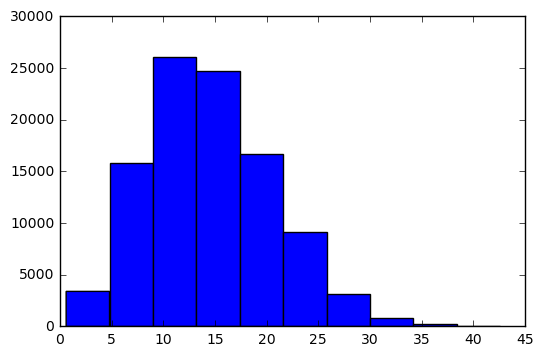

In [24]:
plt.hist(p)
plt.show()

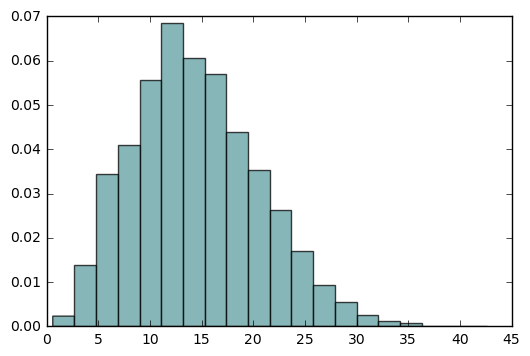

In [25]:
plt.hist(p, 20, normed=1, facecolor='cadetblue', alpha=0.75)
plt.show()

In [26]:
print np.mean(x)
print np.mean(p)

14.5
14.50959


## 3. Motociclista suicida ##

Un motociclista cruza por las esquinas sin frenar.  Supongamos que la probabilidad de que tenga un accidente es de 0.1

In [27]:
p = 0.23

Cuántas cuadras puede hacer antes de tener un accidente?

In [28]:
import random
n = 0
while True:
    x = random.random()
    if x>p: 
        n = n + 1
    else:
        break
n

1

In [29]:
q = []

for i in range(1000):

    n = 0
    while True:
        x = random.random()
        if x>p: 
            n = n + 1
        else:
            break
    q.append(n)

In [30]:
Nmax = 25
c = [0]*Nmax
for i in range(Nmax):
    c[i] = q.count(i)
    

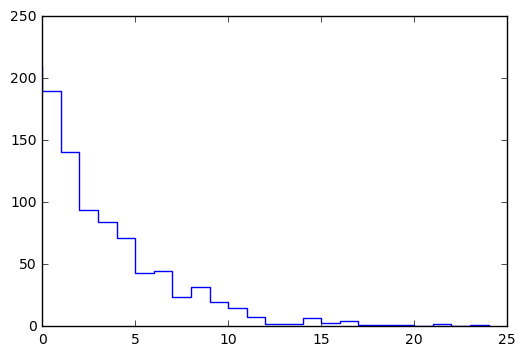

In [31]:
import matplotlib.pyplot as plt
plt.step(range(Nmax), c)
plt.show()

In [36]:
import scipy.stats as std

In [37]:
n = 100
p = 0.23

std.binom.ppf(0.3, n, p)

21.0

In [38]:
x = np.arange(std.geom.ppf(0.0001, p), std.geom.ppf(0.999, p))

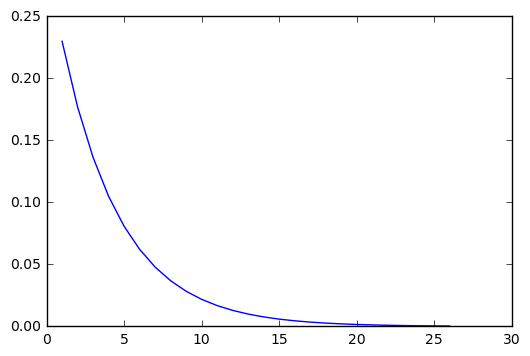

In [39]:
plt.plot(x, std.geom.pmf(x, p))
plt.show()

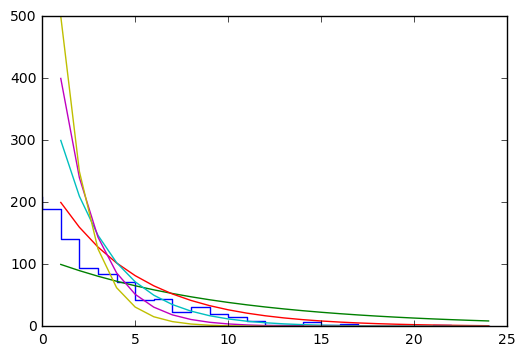

In [41]:
x = range(Nmax)


plt.step(x, c)

p = 0.23


for p in [0.1, 0.2, 0.3, 0.4, 0.5]:
    y = 1000*std.geom.pmf(x, p)
    plt.plot(x[1:], y[1:])

plt.show()